In [3]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
dataset=randn(25)

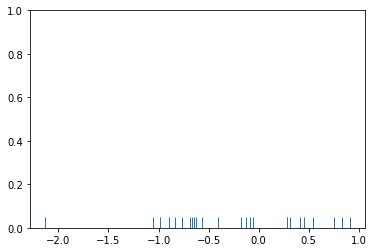

In [5]:
sns.rugplot(dataset)

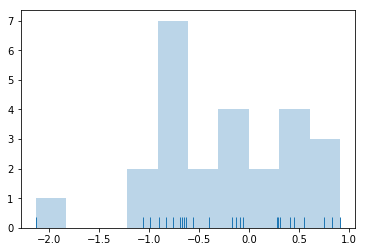

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

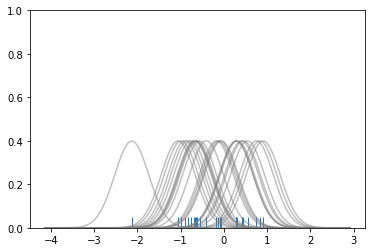

In [7]:
sns.rugplot(dataset)

x_min=dataset.min()-2
x_max=dataset.max()+2
x_axis=np.linspace(x_min,x_max,100)

bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list=[]
for data_point in dataset:
    kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel=kernel/kernel.max()
    kernel=kernel*0.4
    plt.plot(x_axis,kernel,color='gray',alpha=0.5)
    plt.ylim(0,1)#縦軸を０から１に

In [8]:
#それぞれのでーたぽいんんとごとに正規分布ができているのがわかる

In [9]:
#ここからがカーネル密度推定

Text(0.5, 0.98, 'Sum of the Basis Functions ')

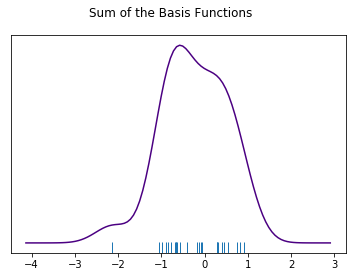

In [11]:
sum_of_kde=np.sum(kernel_list,axis=0)

fig=plt.plot(x_axis,sum_of_kde,color='indigo')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions ')

In [12]:
#一個一個を足し合わせて滑らかにしている
#実はseabornで簡単にかける

C:\Users\mkou0\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


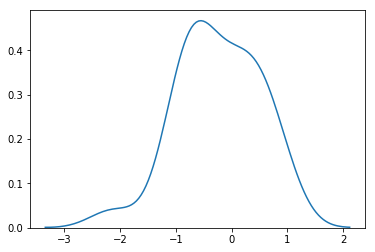

In [13]:
sns.kdeplot(dataset)

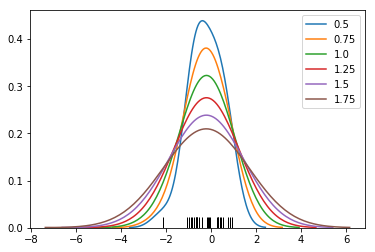

In [16]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

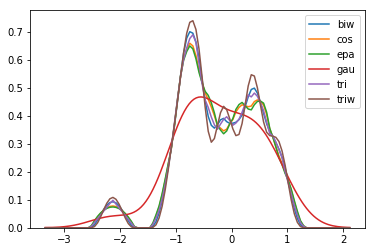

In [19]:
kernel_options=['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

C:\Users\mkou0\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


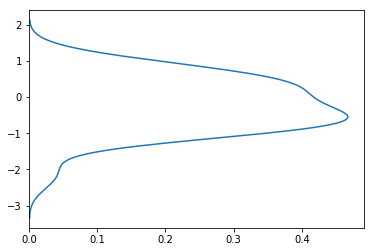

In [21]:
sns.kdeplot(dataset,vertical=True)
#verticalにかける

(array([ 1.,  1.,  1.,  3., 10., 12., 16., 18., 22., 25.]),
 array([-2.13126745, -1.82721119, -1.52315493, -1.21909868, -0.91504242,
        -0.61098616, -0.3069299 , -0.00287365,  0.30118261,  0.60523887,
         0.90929512]),
 <a list of 10 Patch objects>)

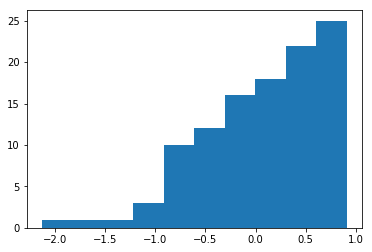

In [22]:
plt.hist(dataset,cumulative=True)

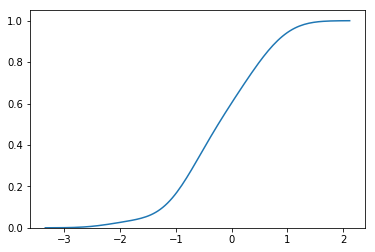

In [23]:
sns.kdeplot(dataset,cumulative=True)

In [24]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)

C:\Users\mkou0\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


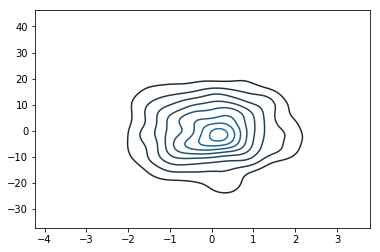

In [25]:
dframe=pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

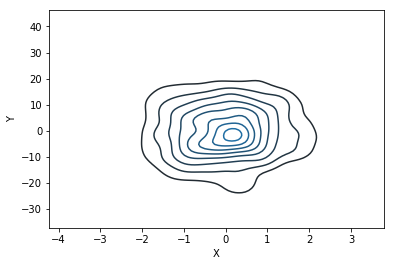

In [26]:
sns.kdeplot(dframe.X,dframe.Y)

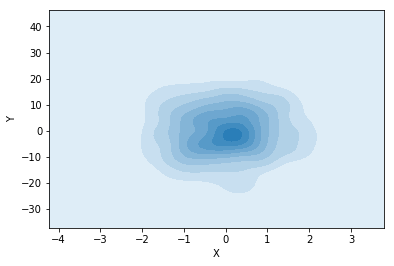

In [27]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

C:\Users\mkou0\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


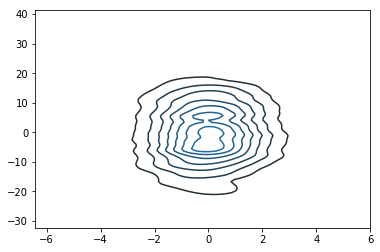

In [28]:
sns.kdeplot(dframe,bw=1)

C:\Users\mkou0\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


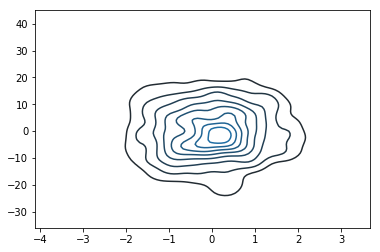

In [29]:
sns.kdeplot(dframe,bw='silverman')

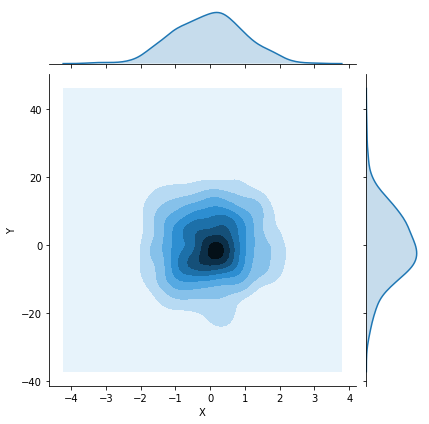

In [30]:
sns.jointplot('X','Y',dframe,kind='kde')